# Demo Plotting Script.

This script is intended to help with debugging problems and solvers.

It create a problem-solver pairing (using the directory) and runs multiple macroreplications of the solver on the problem.

## Append SimOpt Path

Since the notebook is stored in simopt/notebooks, we need to append the parent simopt directory to the system path to import the necessary modules later on.

In [7]:
import sys
from pathlib import Path

# Take the current directory, find the parent, and add it to the system path
sys.path.append(str(Path.cwd().parent))

## Configuration Parameters

This section defines the core parameters for the plotting demo.

To query model/problem/solver names, run `python scripts/list_directories.py`

In [8]:
solver_names = {"RNDSRCH", "ASTRODF", "NELDMD"}
problem_names = {"SAN-1"}

num_macroreps = 10
num_postreps = 200
num_postreps_init_opt = 200

In [9]:
# Import the ProblemSolver class and other useful functions
from simopt.experiment_base import (
    ProblemSolver,
    post_normalize,
    read_experiment_results,
)

myexperiments: list[ProblemSolver] = []
for problem_name in problem_names:
    problem_experiments = []
    for solver_name in solver_names:
        print(f"Testing solver {solver_name} on problem {problem_name}.")
        # Initialize an instance of the experiment class.
        myexperiment = ProblemSolver(solver_name, problem_name)

        # Run a fixed number of macroreplications of the solver on the problem.
        myexperiment.run(n_macroreps=num_macroreps)

        # If the solver runs have already been performed, uncomment the
        # following pair of lines (and uncommmen the myexperiment.run(...)
        # line above) to read in results from a .pickle file.
        file_name = solver_name + "_on_" + problem_name + ".pickle"
        myexperiment = read_experiment_results(file_name)

        print("Post-processing results.")
        # Run a fixed number of postreplications at all recommended solutions.
        myexperiment.post_replicate(n_postreps=num_postreps)

        problem_experiments.append(myexperiment)

    # Find an optimal solution x* for normalization.
    post_normalize(problem_experiments, n_postreps_init_opt=num_postreps_init_opt)

    # Add the experiments for this problem to the main list.
    myexperiments.extend(problem_experiments)

Testing solver NELDMD on problem SAN-1.
Post-processing results.
Testing solver RNDSRCH on problem SAN-1.
Post-processing results.
Testing solver ASTRODF on problem SAN-1.
Post-processing results.


Plotting results...
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/SOLVER_SET_SAN-1_terminal_box_unnorm (1) (2) (3) (4) (5).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/SOLVER_SET_SAN-1_terminal_box (1) (2) (3) (4) (5).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/NELDMD_SAN-1_terminal_violin_unnorm (1) (2) (3) (4) (5).png'), WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/RNDSRCH_SAN-1_terminal_violin_unnorm (1) (2) (3) (4) (5).png'), WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/ASTRODF_SAN-1_terminal_violin_unnorm (1) (2) (3) (4) (5).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_11-55-04/plots/SOLVER_SET_SAN-1_terminal_violin (1) (2) (3) (4) (5).png')]
Plotting compl

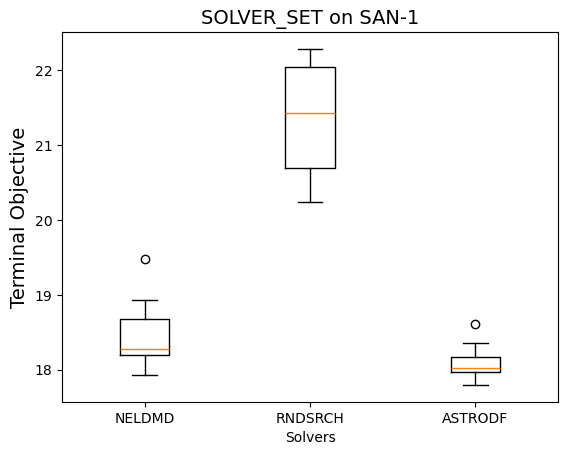

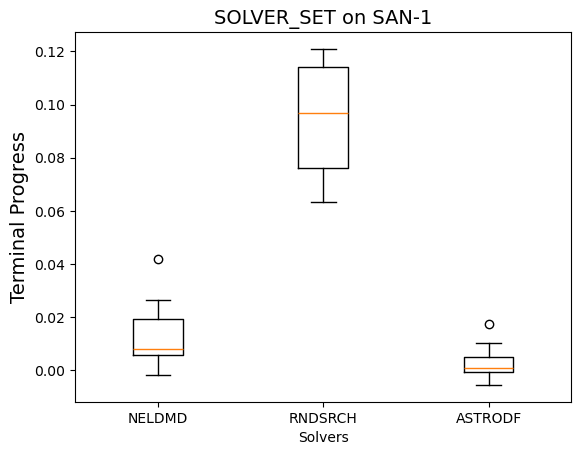

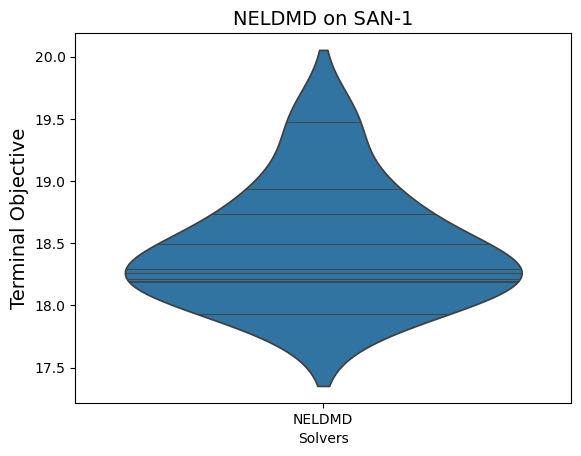

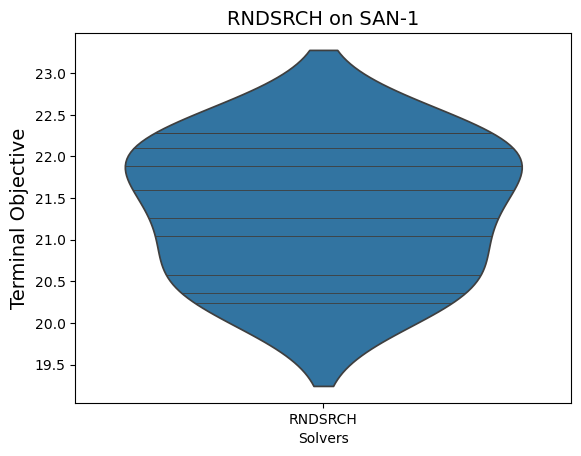

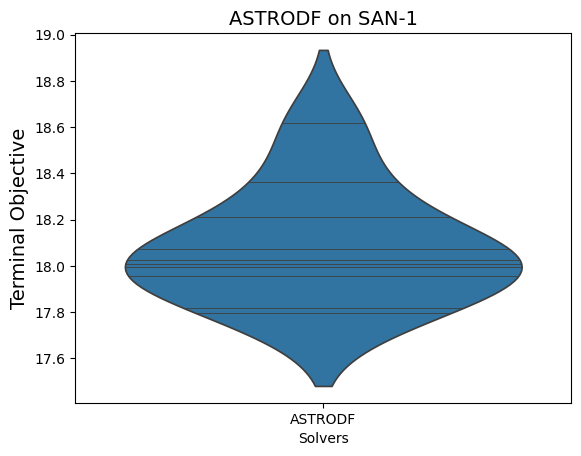

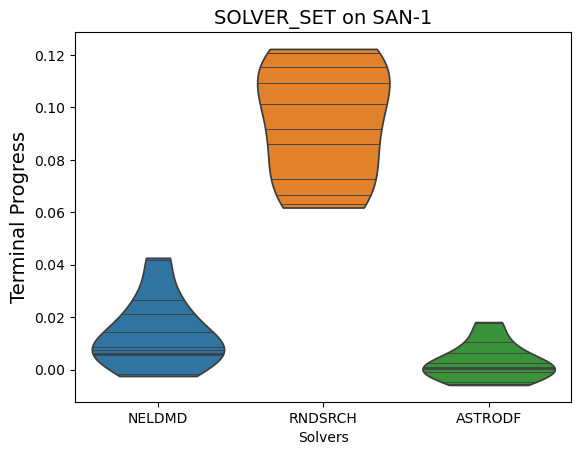

In [12]:
# Produce basic plots.

from simopt.experiment_base import (
    PlotType,
    plot_terminal_progress,
)

print("Plotting results...")


def _print_path(plot_path: list[Path]) -> None:
    print(f"Plot saved to {plot_path!s}")


_print_path(
    plot_terminal_progress(
        experiments=myexperiments, plot_type=PlotType.BOX, normalize=False
    )
)

_print_path(
    plot_terminal_progress(
        experiments=myexperiments, plot_type=PlotType.BOX, normalize=True
    )
)

_print_path(
    plot_terminal_progress(
        experiments=myexperiments,
        plot_type=PlotType.VIOLIN,
        normalize=False,
        all_in_one=False,
    )
)

_print_path(
    plot_terminal_progress(
        experiments=myexperiments, plot_type=PlotType.VIOLIN, normalize=True
    )
)

print("Plotting complete!")